# Linear Discriminant Analysis

Assim como o PCA, a LDA é uma técnica de transformação linear que também pode ser utilizada para redução de dimensionalidade, com a diferença que a LDA é supervisionada, enquanto o PCA é não supervisionado.

O PCA sumariza o conjunto de caracteristicas se orientando pela direção das maiores variâncias. Em datasets grandes, muitas caracteristicas podem ser redundantes e correlatas, cuja remoção geralmente não causa grande impacto no dataset para maioria das tarefas.

Já a LDA busca reduzir a dimensionalidade dos dados retendo informações capazes de discriminar a classe a ser predita. A LDA tenta encontrar a reta (hiperplano) entre os agrupamentos de cada classe. Sendo assim, ela tenta projetar as amostras em um espaco dimensional onde esses agrupamentos são o mais bem separaveis possível, e que cada elemento esteja o mais próximo possível do centro do agrupamento. As novas dimensões são ranqueadas de acordo com suas capacidades de maximizar a distância entre os agrupamentos e minimizar a distância entre os pontos dentro de um agrupamento e seu centro. Essas dimensões formam os discriminantes lineares do conjunto de caracteristicas.



## Implementando LDA com o Scikit-learn:

Vamos utilizar o dataset Iris, simples e famoso para problemas de classificação. Informações sobre o dataset podem ser encontradas no link a seguir:
https://archive.ics.uci.edu/ml/datasets/iris

## Importando pacotes e o dataset

In [1]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

## Processamento dos dados

Uma vez que o dataset esteja carregado em um dataframe pandas, o primeiro passo e separar o vetor de caracteristicas e os rotulos correspontes, e em seguida dividi-lo em treinamento e teste:

In [2]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Normalização dos dados

Assim como a maioria dos algoritmos de ML, a LDA também requer (ou pelo menos funciona melhor) que os dados estejam normalizados.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Executando a LDA

São necessárias apenas poucas linhas para executarmos a LDA, utilizando a classe `LinearDiscriminantAnalysis`.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
#lda = lda.fit(X_train, y_train)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
#pred = lda.predict(X_test)

No código acima, importamos a LDA passando como parâmetro o número de componentes que desejamos extrair, nesse caso 1. 

Na sequência, executamos a função `fit_transform` para treinar e converter os dados de treinamento, e `transform` para converter os dados de teste considerando o modelo já treinado.

Note que, por ser um algoritmo supervisionado, a LDA requer como parâmetro os rótulos (y_train) para treinamento, diferente do PCA que é não-supervisionado.

## Treinando um classificador para predições

Uma vez que gostaríamos de comparar a performance da LDA com o PCA, podemos considerar uma tarefa de classificação utilizando, por exemplo, o classificador Random Forest:

In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Avaliando o desempenho

Como de costume, o último passo é avaliar o desempenho do algoritmo utilizando alguma métrica, como por exemplo, a matriz de confusão, para verificarmos o quão bem o modelo foi na tarefa:

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n Acurácia ' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Acuracia 1.0


Podemos ver que mesmo com um único componente, o algoritmo foi capaz de obter uma acurácia de 100%.

## Agora, iremos testar em um banco de dados mais complexo que o IRIS...

In [7]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# dimensão mnist -> n = 784 -> 2 dim.
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [11]:
y_test = y_test.astype(int) # -> 0, 1, 2, ..., 9

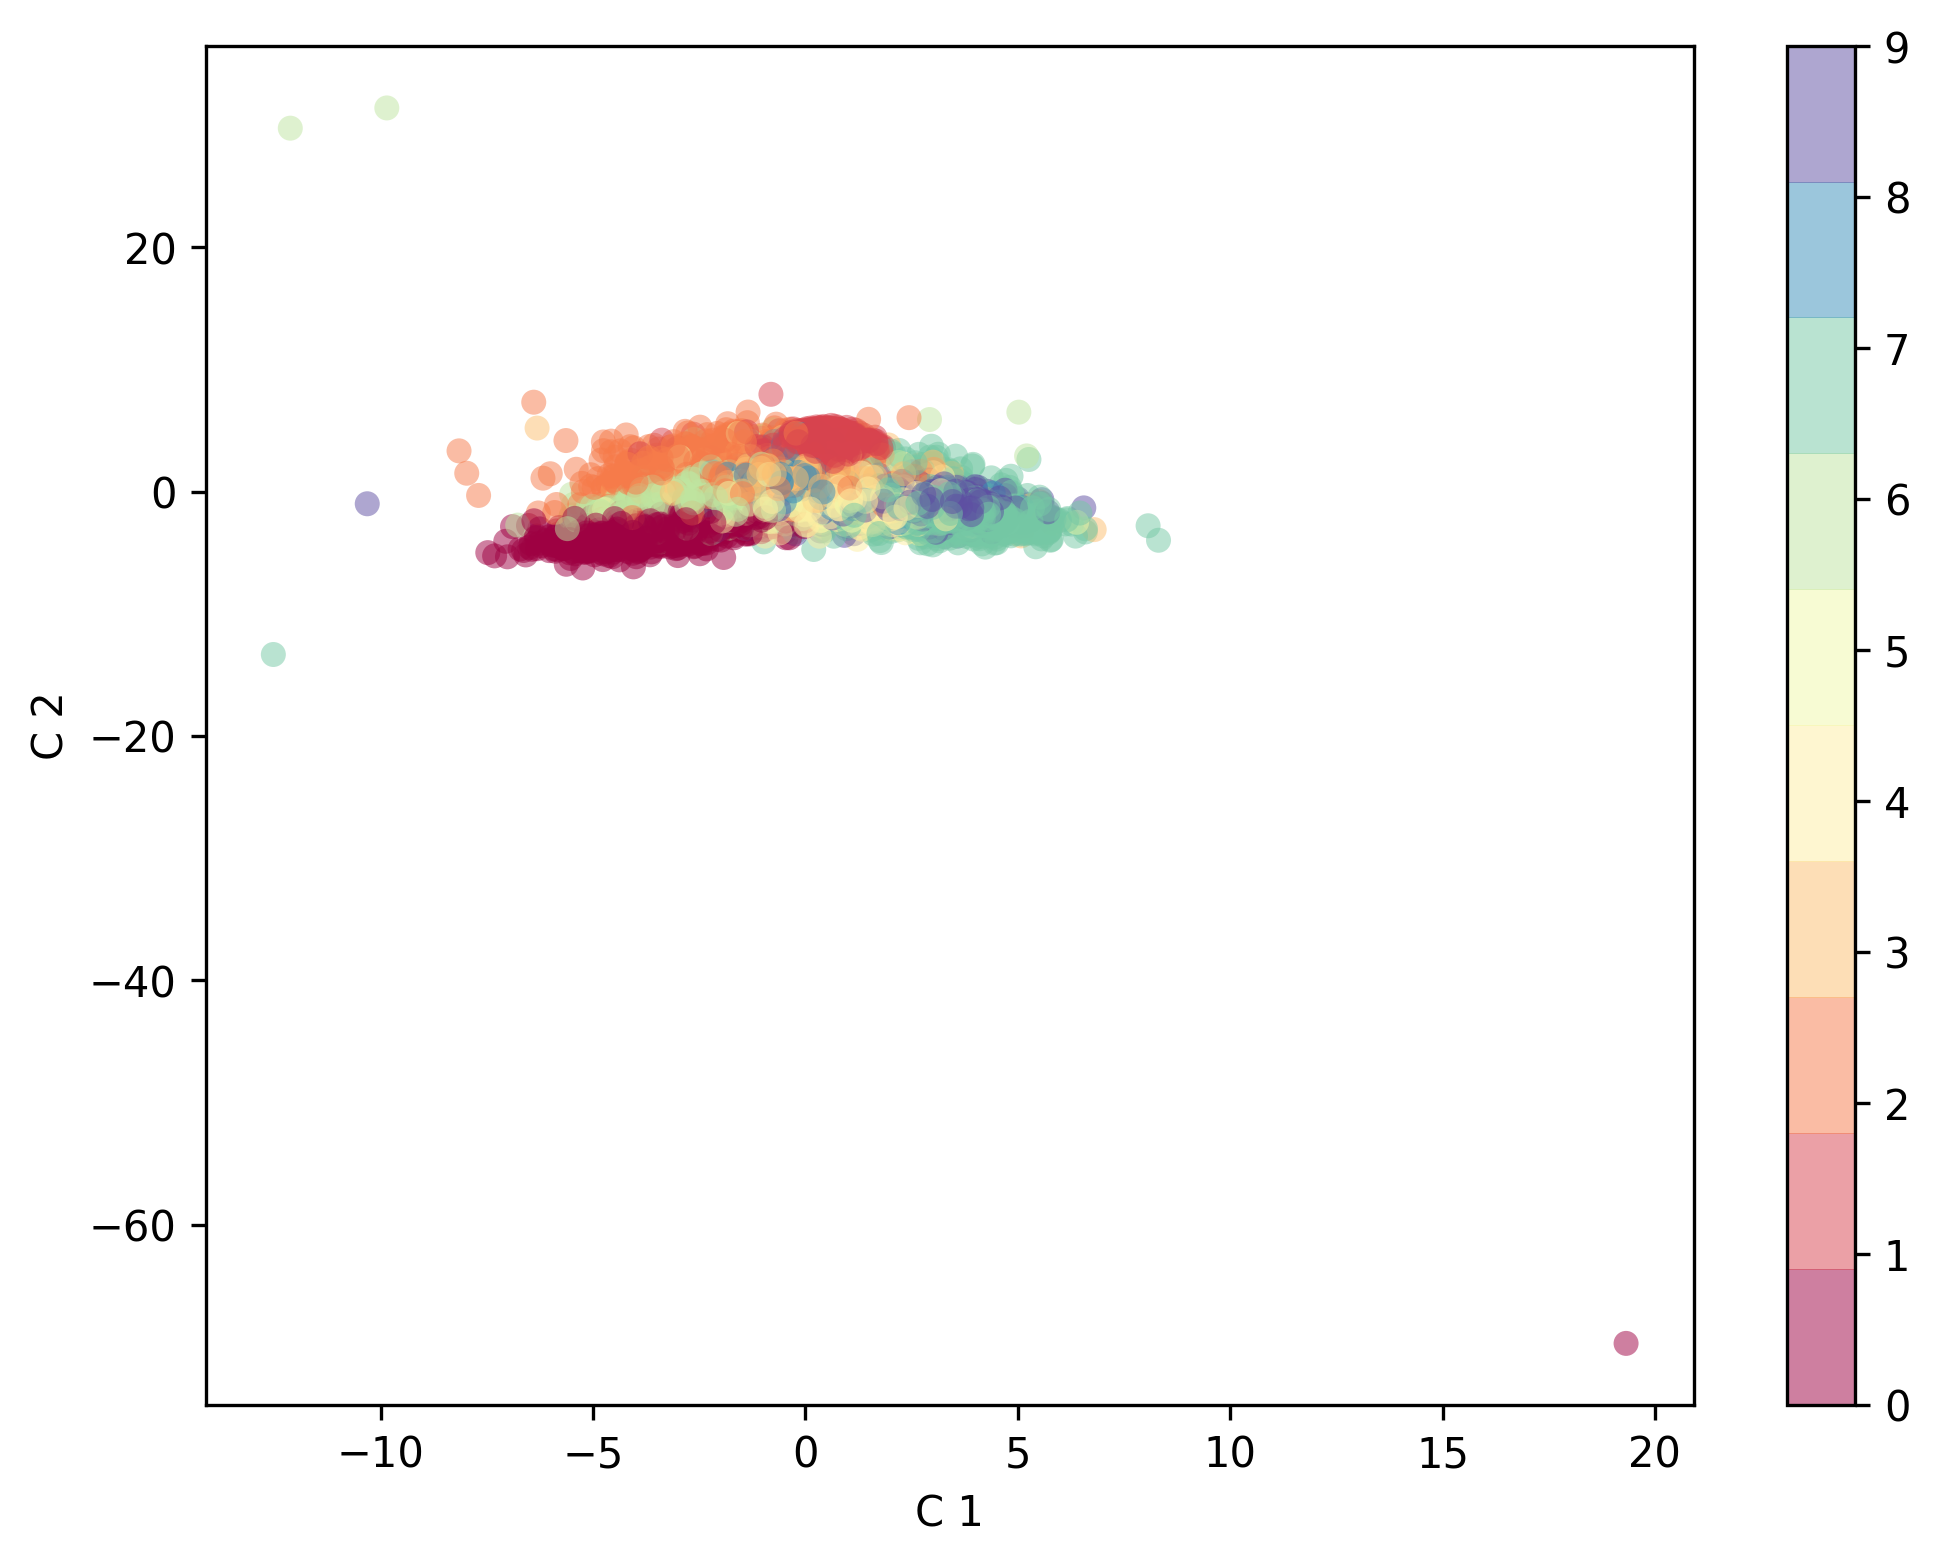

In [12]:
plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_test, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('C 1')
plt.ylabel('C 2')
plt.colorbar();

### Para visualizar melhor (reduzir escala/distorções), iremos clipar as componentes com valor maior que 20 e menor que -20 (análise gráfica anterior).

In [13]:
test_clip = X_test
test_clip[test_clip>20]=20
test_clip[test_clip<-20]=-20

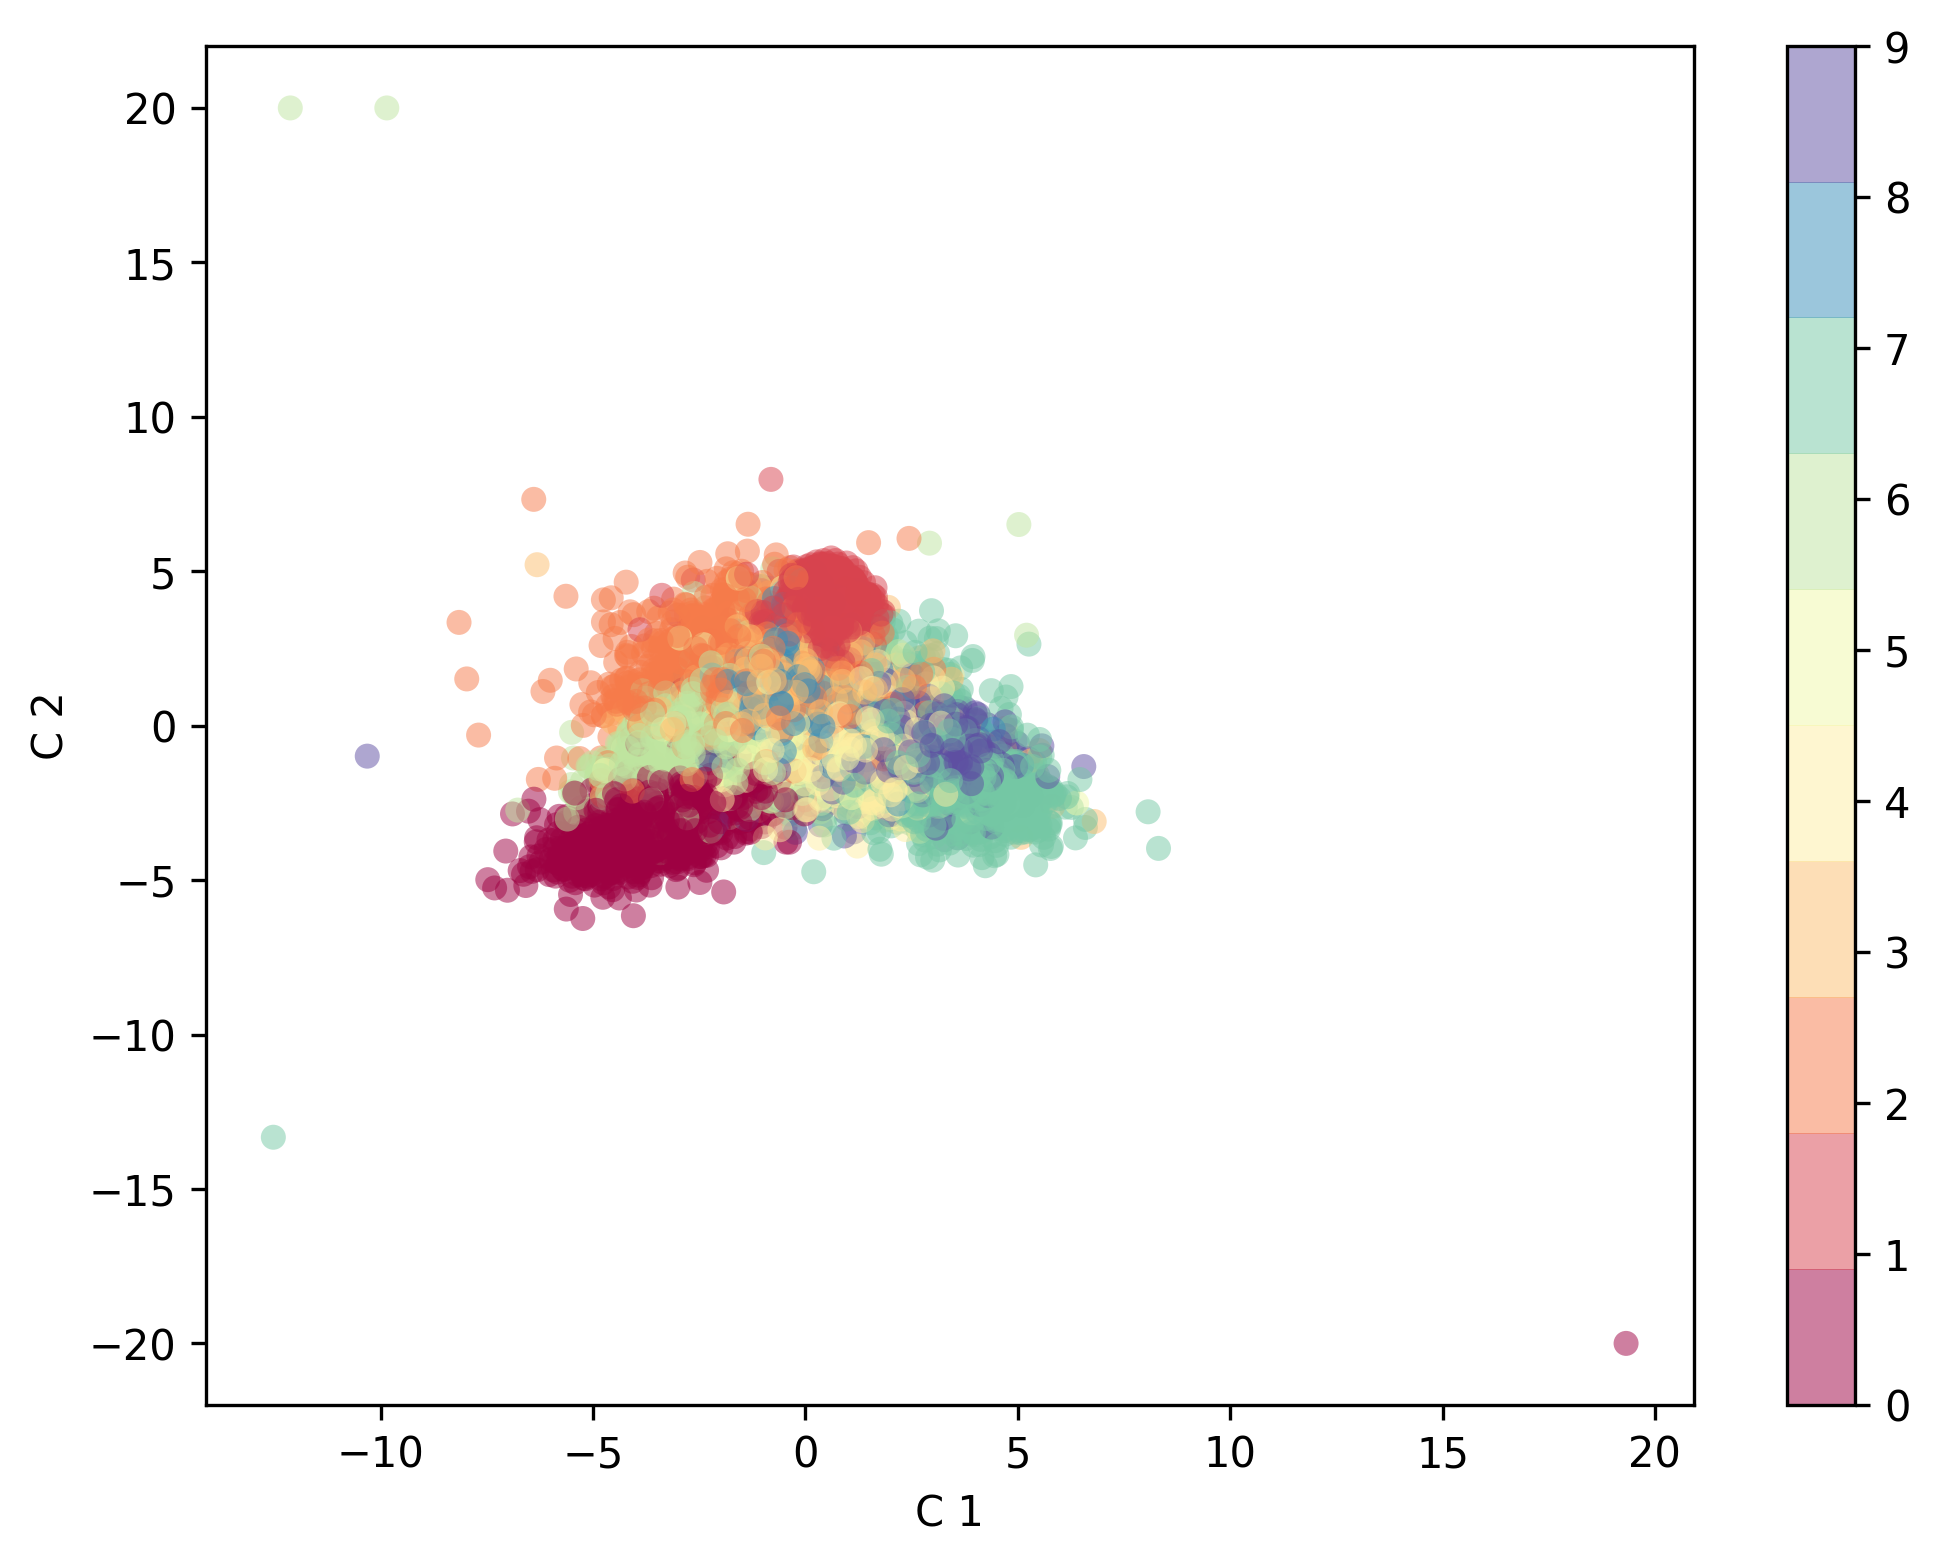

In [14]:
plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(test_clip[:, 0], test_clip[:, 1],
            c=y_test, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('C 1')
plt.ylabel('C 2')
plt.colorbar();

### Notem que, possivelmente, com 3 componentes os dados ficariam menos sobrepostos, e conseguiríamos visualizar melhor a separação interclasses. Sugiro testar essa hipótese!

In [19]:
classifier = RandomForestClassifier(random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test).astype(int)

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('̣̣̣\n Acurácia ' + str(accuracy_score(y_test, y_pred)))

[[1747    0    7    3   10   74  219    4    9    4]
 [   0 2200   39   47   11    8    1   13   65    1]
 [  14   66  852  421   44  162  218    6  318   14]
 [   7   49  398  671   72  219   97   48  518   38]
 [  15   10   27   46 1132   89    9  189   47  440]
 [  61   10  138  218  113  831  256   12  237   24]
 [ 285    2  194  106   16  274 1077    9   79    3]
 [   3   22   12   45  324   12    2 1195   24  550]
 [  21   96  307  589   92  309   82   16  502   28]
 [  13    3   18   28  604   32    4  539   32  853]]
̣̣̣
 Acurácia 0.5266666666666666


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2077
           1       0.90      0.92      0.91      2385
           2       0.43      0.40      0.41      2115
           3       0.31      0.32      0.31      2117
           4       0.47      0.56      0.51      2004
           5       0.41      0.44      0.43      1900
           6       0.55      0.53      0.54      2045
           7       0.59      0.55      0.57      2189
           8       0.27      0.25      0.26      2042
           9       0.44      0.40      0.42      2126

    accuracy                           0.53     21000
   macro avg       0.52      0.52      0.52     21000
weighted avg       0.52      0.53      0.52     21000



## PCA vs LDA: qual escolher para tarefa de redução de dimensionalidade?

Para casos em que os dados são distribuídos de maneira uniforme, a LDA quase sempre se sai melhor que o PCA. No entando, para dados muito irregulares, o PCA pode se dar melhor, uma vez que a LDA pode tender para classes majoritarias (lembrar do $m_i$).

Por fim, o PCA tem a vantagem de poder ser aplicado em datasets rotulados e não rotulados, enquanto a LDA necessita dos rótulos para guiar o aprendizado.

# Exercícios

1. Execute o PCA nos exemplos acima, usando os datasets e os classificadores Random Forest e SVM. Compare os resultados PCA vs. LDA -> mesmo número de componentes ($d$).

2. Comparar a LDA com o PCA para redução de caracteristicas utilizando o dataset _faces_. Como classificador, compare os resultados do SVM e do Random Forest.

3. A LDA também pode ser usada como um algoritmo de classificação, em que ele próprio encontra o hiperplano que melhor separa os dados. Compare a LDA na tarefa de classificação com os resultados do exercício utilizando o banco MNIST.